In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
def statfix(data, verbose=False):
    q0 = data.quantile(0)
    q1 = data.quantile(.25)
    q2 = data.quantile(.5)
    q3 = data.quantile(.75)
    q4 = data.quantile(1)
    if verbose:
        print(f'0 QUANTILE: {q0}')
        print(f'25 QUANTILE: {q1}')
        print(f'50 QUANTILE: {q2}')
        print(f'75 QUANTILE: {q3}')
        print(f'100 QUANTILE: {q4}')

        print('\n')

        print(f'Standart Deviation: {data.std()}')
        print(f'Median: {data.median()}')
    
    return data[(data > (q1 - 1.5*(q3-q1))) & (data < (q3 + 1.5*(q3-q1)))]

def dataframefix(data):
    data['ID'] = data['ID'].apply(lambda x: str(x).split('.')[0])
    data['Topic'] = data['Topic'].apply(lambda x: str(x).split(','))
    data['Context'] = data['Context'].apply(lambda x: re.sub(' a ','',' ' + str(x)))
    data['Context'] = data['Context'].apply(lambda x: re.sub(' an ','',' ' + str(x)).lstrip(' ').rstrip(' '))
    data['Context'] = data['Context'].apply(lambda x: ''.join(c for c in x if c.isalnum() | (c == ' ')))
    
    return data

## LIAR, LIAR analysis

In [32]:
df = pd.read_csv('../data/liar_dataset/train.tsv',sep='\t',header=None,
                 names=['ID','Label','Text','Topic','Author','Speakers_title','Location','Politic_views','BT_counts','F_counts','HT_counts',
                          'MT_counts','PoF_counts','Context'])

fillna_values = {'BT_counts':0,'F_counts':0,'HT_counts':0,'MT_counts':0,'PoF_counts':0}



df.head()

,ID,Label,Text,Topic,Author,Speakers_title,Location,Politic_views,BT_counts,F_counts,HT_counts,MT_counts,PoF_counts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [33]:
df['ID'] = df['ID'].apply(lambda x: str(x).split('.')[0])
df['Topic'] = df['Topic'].apply(lambda x: str(x).split(','))
df['Context'] = df['Context'].apply(lambda x: re.sub(' a ','',' ' + str(x)))
df['Context'] = df['Context'].apply(lambda x: re.sub(' an ','',' ' + str(x)).lstrip(' ').rstrip(' '))
df['Context'] = df['Context'].apply(lambda x: ''.join(c for c in x if c.isalnum() | (c == ' ')))

df = df.fillna(value = fillna_values)

df_valid = pd.read_csv('../data/liar_dataset/valid.tsv',sep='\t',header=None,
                       names=['ID','Label','Text','Topic','Author','Speakers_title','Location','Politic_views','BT_counts','F_counts','HT_counts',
                          'MT_counts','PoF_counts','Context'])

df_valid = dataframefix(df_valid)
df_valid = df_valid.fillna(value = fillna_values)

df = df.append(df_valid)

df.head()

,ID,Label,Text,Topic,Author,Speakers_title,Location,Politic_views,BT_counts,F_counts,HT_counts,MT_counts,PoF_counts,Context
0,2635,false,Says the Annies List political group supports ...,[abortion],dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,mailer
1,10540,half-true,When did the decline of coal start? It started...,"[energy, history, job-accomplishments]",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,floor speech
2,324,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",[foreign-policy],barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123,false,Health care reform legislation is likely to ma...,[health-care],blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,news release
4,9028,half-true,The economic turnaround started at the end of ...,"[economy, jobs]",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,interview on CNN


### Data exploration

half-true      2362
false          2258
mostly-true    2213
barely-true    1891
true           1845
pants-fire      955
Name: Label, dtype: int64


<BarContainer object of 6 artists>

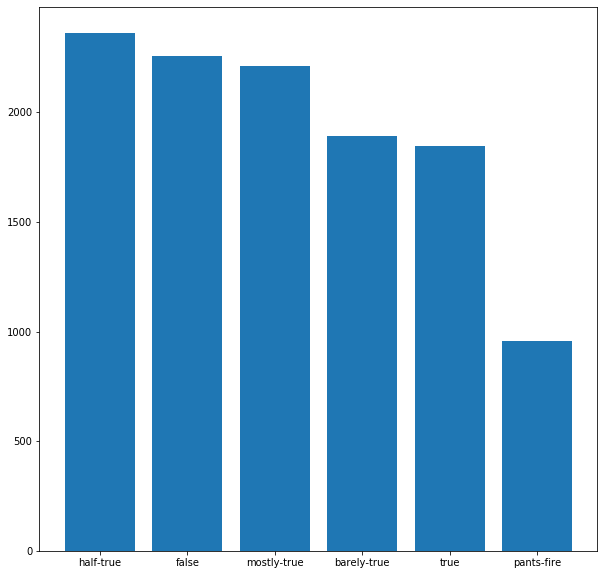

In [34]:
print(df.Label.value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,10))
plt.bar(df.Label.value_counts().keys(),df.Label.value_counts().values)

143


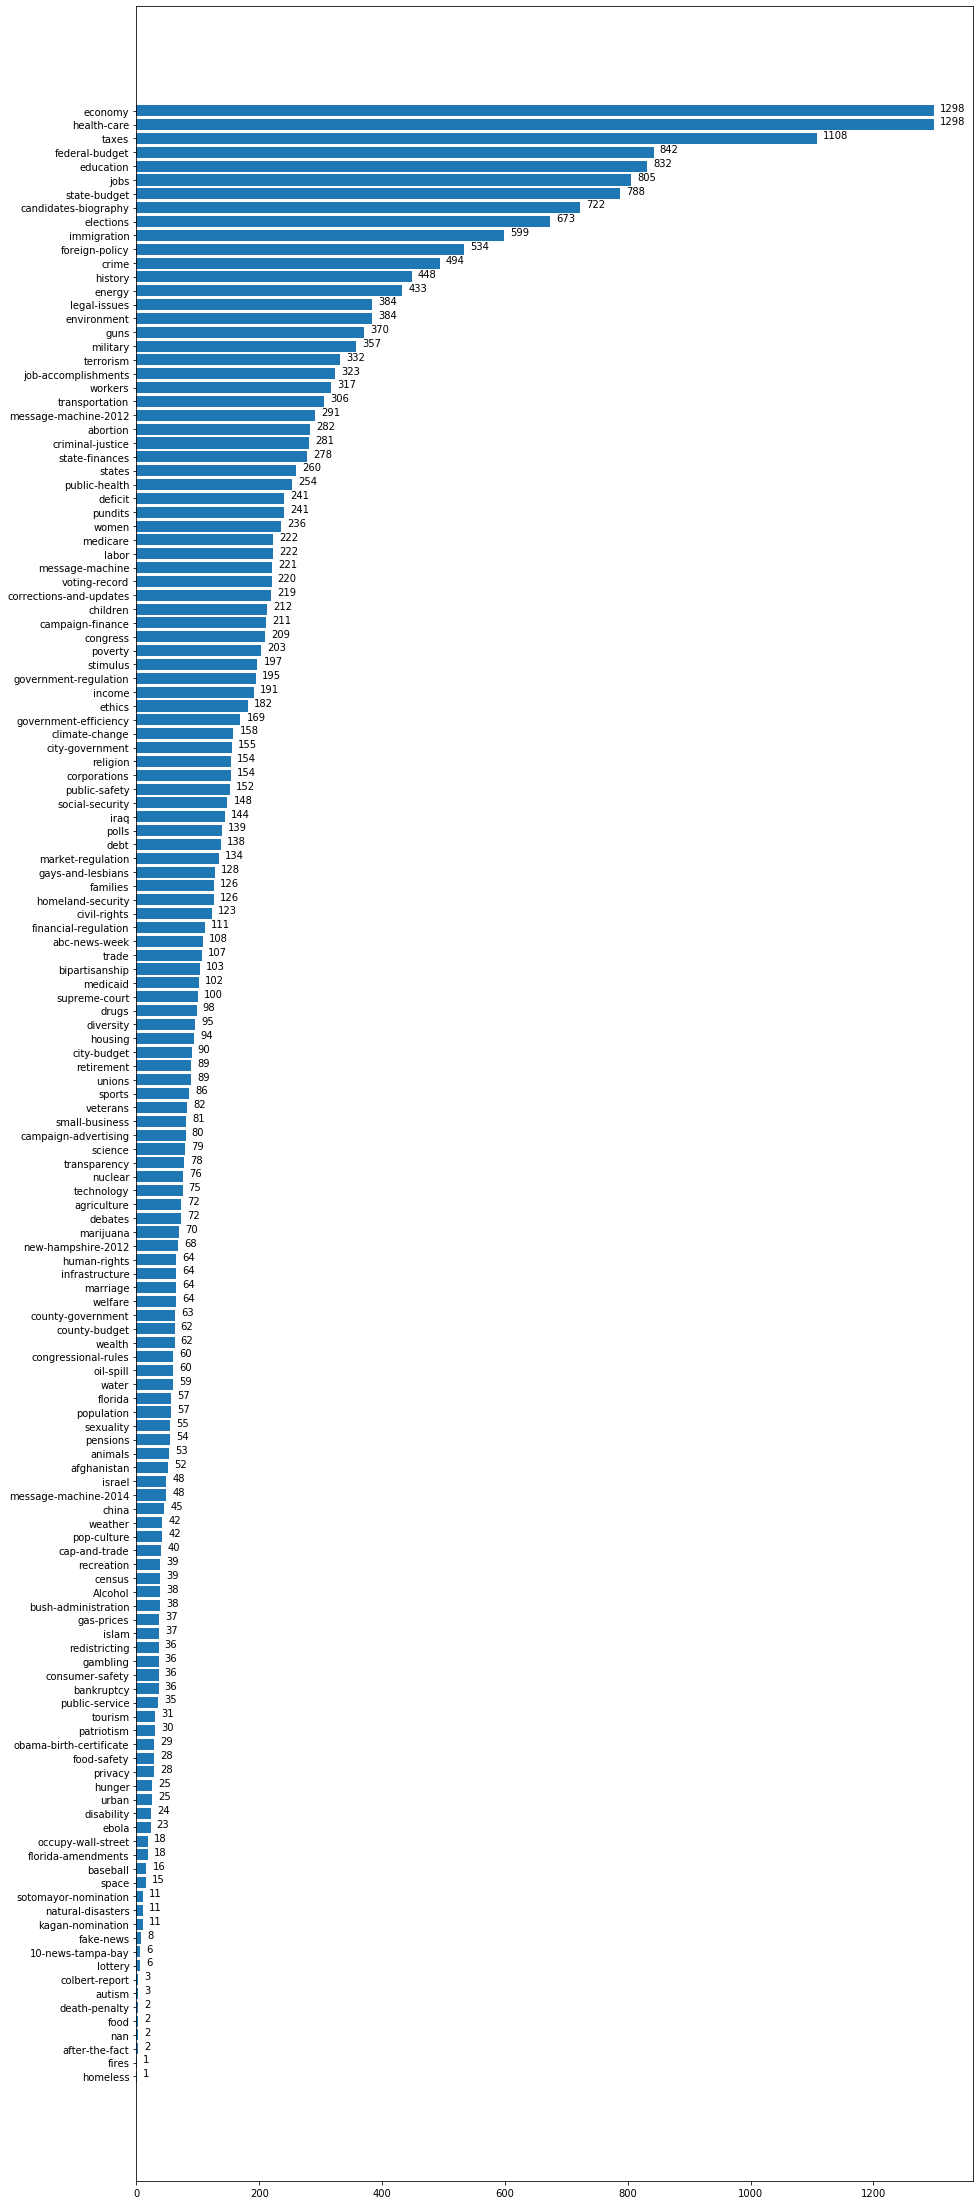

In [35]:
# We explore counts of unique topics
# and its distribution

Topics = df.Topic.values
List_of_topics = []
for i in Topics:
    List_of_topics += i
    
Unique_topics = list(set(List_of_topics))
print(len(Unique_topics))
    
Topic_counter = {}
for top in List_of_topics:
    if top not in list(Topic_counter.keys()):
        Topic_counter[top] = 1
    else:
        Topic_counter[top] += 1
        
Topic_counter = {k: v for k, v in sorted(Topic_counter.items(), key=lambda item: item[1])}

plt.figure(figsize=(15,40))
plt.barh(list(Topic_counter.keys()), Topic_counter.values())

for index, value in enumerate(list(Topic_counter.values())):
    plt.text(value+10, index, str(value))

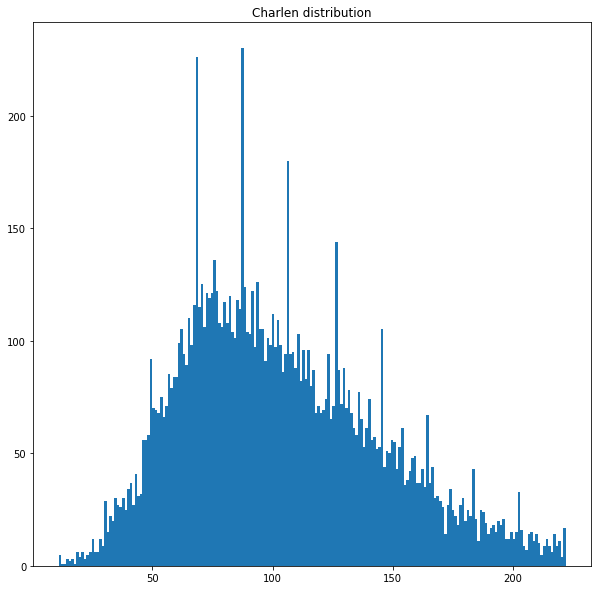

In [7]:
#distributions of word-length and char-length of news texts
plt.figure(figsize=(10,10))
_ = plt.hist(statfix(df.Text.apply(lambda x: len(str(x)))), bins=200)
plt.title('Charlen distribution')
plt.show()

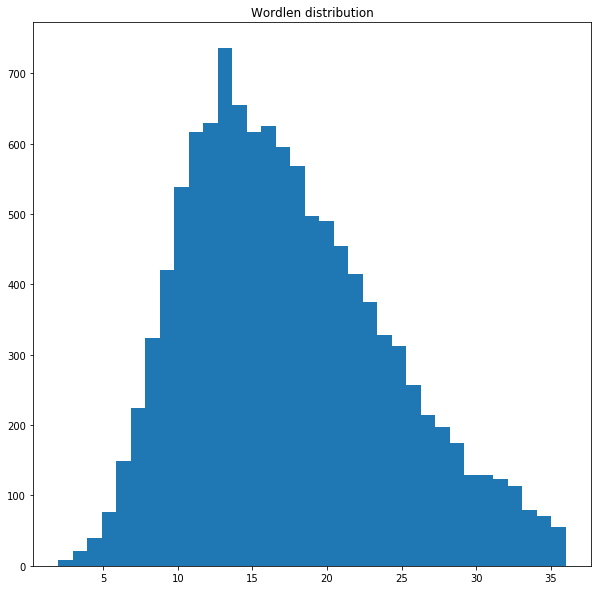

In [8]:
plt.figure(figsize=(10,10))
_ = plt.hist(statfix(df.Text.apply(lambda x: len(str(x).split(' ')))),bins=35)
plt.title('Wordlen distribution')
plt.show()

In [9]:
print('CHARLEN:')
_ = statfix(df.Text.apply(lambda x: len(str(x))),verbose=True)
print('WORDLEN:')
_ = statfix(df.Text.apply(lambda x: len(str(x).split(' '))),verbose=True)

CHARLEN:
0 QUANTILE: 11.0
25 QUANTILE: 73.0
50 QUANTILE: 99.0
75 QUANTILE: 133.0
100 QUANTILE: 3192.0


Standart Deviation: 58.415050560624906
Median: 99.0
WORDLEN:
0 QUANTILE: 2.0
25 QUANTILE: 12.0
50 QUANTILE: 17.0
75 QUANTILE: 22.0
100 QUANTILE: 302.0


Standart Deviation: 8.450893657615715
Median: 17.0


In [10]:
df.Politic_views.value_counts()

republican                      5094
democrat                        3731
none                            1967
organization                     237
independent                      166
newsmaker                         63
libertarian                       46
activist                          43
journalist                        40
columnist                         37
talk-show-host                    29
state-official                    20
labor-leader                      15
tea-party-member                  10
business-leader                   10
green                              3
education-official                 3
constitution-party                 2
Moderate                           1
county-commissioner                1
government-body                    1
ocean-state-tea-party-action       1
democratic-farmer-labor            1
liberal-party-canada               1
Name: Politic_views, dtype: int64

In [11]:
df.Speakers_title.value_counts().sort_values(ascending=False)

President                                  553
U.S. Senator                               540
Governor                                   432
President-Elect                            310
U.S. senator                               292
                                          ... 
political adviser                            1
Attorney and author                          1
Spokeswoman for Gwinnett County Schools      1
Secretary of Veteran Affairs                 1
New Hampshire state representative           1
Name: Speakers_title, Length: 1270, dtype: int64

In [12]:
Politic_views_distribution = df[(df.Politic_views == 'republican') | (df.Politic_views == 'democrat') | (df.Politic_views == 'none')][['Politic_views',
                                                                                                                                       'Label']]

In [13]:
for i in Politic_views_distribution.Politic_views.unique():
    Politic_views_distribution[i] = Politic_views_distribution.Politic_views.apply(lambda x: 1 if x == i else 0)
Politic_views_distribution.drop('Politic_views',axis=1,inplace=True)
Politic_views_distribution

,Label,republican,democrat,none
0,false,1,0,0
1,half-true,0,1,0
2,mostly-true,0,1,0
3,false,0,0,1
4,half-true,0,1,0
...,...,...,...,...
1279,half-true,0,1,0
1280,mostly-true,0,1,0
1281,true,0,0,1
1282,false,0,0,1


<Figure size 1080x1080 with 0 Axes>

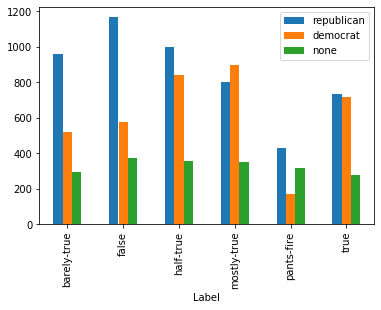

In [14]:
plt.figure(figsize=(15,15))
_ = Politic_views_distribution.groupby('Label').sum().plot.bar()

In [15]:
print(df.Context.nunique())
df.Context.value_counts()

4226


press release                                             333
news release                                              331
speech                                                    308
interview                                                 300
TV ad                                                     263
                                                         ... 
radio discussion                                            1
interview on NPRs Morning Edition                           1
virtual town hall meeting                                   1
constituent email                                           1
blog postings responding tonews video showing the flag      1
Name: Context, Length: 4226, dtype: int64

### Dataset preparation

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from gensim.models import Word2Vec

import string

import pickle

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

tfidf = pickle.load(open("vectorizer.pk", "rb"))
#tfidf = TfidfVectorizer(analyzer='word',stop_words= 'english', ngram_range=(1,2), max_features=1000)
W2V_model = Word2Vec.load('word2vec.model')

In [17]:
#Text processing

def clean_text(text):
    ps = PorterStemmer()
    
    text = ''.join([c if c not in string.punctuation else ' ' for c in text])
    text = text.lower()
    text = ' '.join([word for word in text.split(' ') if word not in set(stopwords.words('english'))])
    text = ' '.join([ps.stem(word) for word in text.split(' ')])
    
    text = text.rstrip(' ').lstrip(' ')
    text = re.sub(' +', ' ', text)
    
    return text

def process_line(line, upgraded=True):
    tf_test_str = tfidf.transform([line]).toarray()[0]
    tf_test_dict = {}
    for i in tfidf.vocabulary_.keys():
        tf_test_dict[i] = tf_test_str[tfidf.vocabulary_[i]]

    final_vector = []
    for word in line.split(' '):
        if (word in W2V_model.wv) and (word in tf_test_dict.keys()):
            if upgraded == True:
                vector = W2V_model.wv[word]*tf_test_dict[word]
            else:
                vector = W2V_model.wv[word]
            final_vector.append(vector)

    final_vector = np.array(final_vector)
    final_vector = np.mean(final_vector, axis=0)


    return final_vector

def get_dataset(data, labeled=True, upgraded=True, counters=False, topics=False, FRE=False, train=False):
    y_labels_dict = {'pants-fire': 0, 'false': 1,'barely-true': 2, 'half-true':3, 'mostly-true': 4, 'true': 5}
    popular_topics = list(Topic_counter.keys())[:15]
    
    data['CleanText'] = data.Text.apply(lambda x: clean_text(x))
    X = data.CleanText.apply(lambda x: process_line(x, upgraded)).to_numpy()
    X = np.array([list(i) for i in X])
    #if train:
    #    X = tfidf.fit_transform(data.CleanText.values).toarray()
    #else:
    #    X = tfidf.transform(data.CleanText.values).toarray()
    
    if topics:
        for topic in popular_topics:
            data[topic] = data.Topic.apply(lambda x: 1 if topic in x else 0)
        
        X = np.concatenate((X, np.array(data[popular_topics].values)),axis=1)
        
    if FRE:
        data['FRE'] = data['Text'].apply(lambda x: 206.835 - 1.015*(len(x.strip(' '))/len(re.split('.!?',x))) - 84.6*(len(x)/len(x.split(' '))))
        FRE_arr = np.array(data.FRE.values).reshape(-1,1)
        X = np.concatenate((X, FRE_arr),axis=1)
            
    if counters:
        X = np.concatenate((X, np.array(data[['BT_counts','F_counts','HT_counts','MT_counts','PoF_counts']].values)),axis=1)
    
    if labeled:
        y = np.array(data.Label.apply(lambda x: y_labels_dict[x]).values)
        return X, y
    
    return X

In [18]:
X_train, y_train = get_dataset(df, upgraded=True, counters=True, topics=True, FRE=False, train=True)
X_train.shape

(11524, 120)

In [19]:

print(df_valid.shape)
df_valid.head()

(1284, 14)


,ID,Label,Text,Topic,Author,Speakers_title,Location,Politic_views,BT_counts,F_counts,HT_counts,MT_counts,PoF_counts,Context
0,12134,barely-true,We have less Americans working now than in the...,"[economy, jobs]",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,interview with ABC17 News
1,238,pants-fire,"When Obama was sworn into office, he DID NOT u...","[obama-birth-certificate, religion]",chain-email,NaN,NaN,none,11,43,8,5,105,nan
2,7891,false,Says Having organizations parading as being so...,"[campaign-finance, congress, taxes]",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,US Ways and Means hearing
3,8169,half-true,Says nearly half of Oregons children are poor.,[poverty],jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,opinion article
4,929,half-true,On attacks by Republicans that various program...,"[economy, stimulus]",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [20]:
X_valid, y_valid = get_dataset(df_valid, upgraded=True, counters=True, topics=True, FRE=True)
X_valid.shape

(1284, 121)

In [21]:
df_test = pd.read_csv('../data/liar_dataset/test.tsv',sep='\t',header=None,
                       names=['ID','Label','Text','Topic','Author','Speakers_title','Location','Politic_views','BT_counts','F_counts','HT_counts',
                          'MT_counts','PoF_counts','Context'])

df_test = dataframefix(df_test)
df_test = df_test.fillna(value = fillna_values)

print(df_test.shape)
df_test.head()

(1267, 14)


,ID,Label,Text,Topic,Author,Speakers_title,Location,Politic_views,BT_counts,F_counts,HT_counts,MT_counts,PoF_counts,Context
0,11972,true,Building a wall on the U.S.-Mexico border will...,[immigration],rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685,false,Wisconsin is on pace to double the number of l...,[jobs],katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,news conference
2,11096,false,Says John McCain has done nothing to help the ...,"[military, veterans, voting-record]",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABCs This Week
3,5209,half-true,Suzanne Bonamici supports a plan that will cut...,"[medicare, message-machine-2012, campaign-adve...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,radio show
4,9524,pants-fire,When asked by a reporter whether hes at the ce...,"[campaign-finance, legal-issues, campaign-adve...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,web video


In [22]:
X_test, y_test = get_dataset(df_test, upgraded=True, counters=True, topics=True, FRE=False)
X_test.shape

(1267, 120)

### Model training

In [23]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, roc_auc_score

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [24]:
lgbmc = LGBMClassifier()
RF = RandomForestClassifier()
SVM = SVC()

In [25]:
lgbmc.fit(X_train, y_train)
RF.fit(X_train, y_train)
SVM.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
pred_lgbmc = lgbmc.predict(X_test)
pred_RF = RF.predict(X_test)
pred_SVM = SVM.predict(X_test)

In [27]:
print('LGBM:')
print(classification_report(y_test, pred_lgbmc))
print('\nRF:')
print(classification_report(y_test, pred_RF))
print('\nSVM:')
print(classification_report(y_test, pred_SVM))

LGBM:
              precision    recall  f1-score   support

           0       0.54      0.53      0.54        92
           1       0.42      0.51      0.46       249
           2       0.43      0.41      0.42       212
           3       0.39      0.39      0.39       265
           4       0.37      0.51      0.43       241
           5       0.48      0.20      0.28       208

    accuracy                           0.42      1267
   macro avg       0.44      0.42      0.42      1267
weighted avg       0.43      0.42      0.41      1267


RF:
              precision    recall  f1-score   support

           0       0.42      0.49      0.45        92
           1       0.34      0.45      0.39       249
           2       0.32      0.33      0.32       212
           3       0.36      0.37      0.37       265
           4       0.41      0.39      0.40       241
           5       0.39      0.21      0.27       208

    accuracy                           0.36      1267
   macro avg

In [36]:
explore_predicts = pd.DataFrame({'LGBM':pred_lgbmc, 'RF':pred_RF, 'SVM':pred_SVM,'True':y_test})
explore_predicts.head()

,LGBM,RF,SVM,True
0,1,1,3,5
1,2,1,2,1
2,1,0,1,1
3,3,2,3,3
4,1,0,1,0


In [40]:
explore_predicts[explore_predicts['SVM'] == 3]['True'].value_counts()

3    131
4     71
2     56
5     52
1     46
0     10
Name: True, dtype: int64

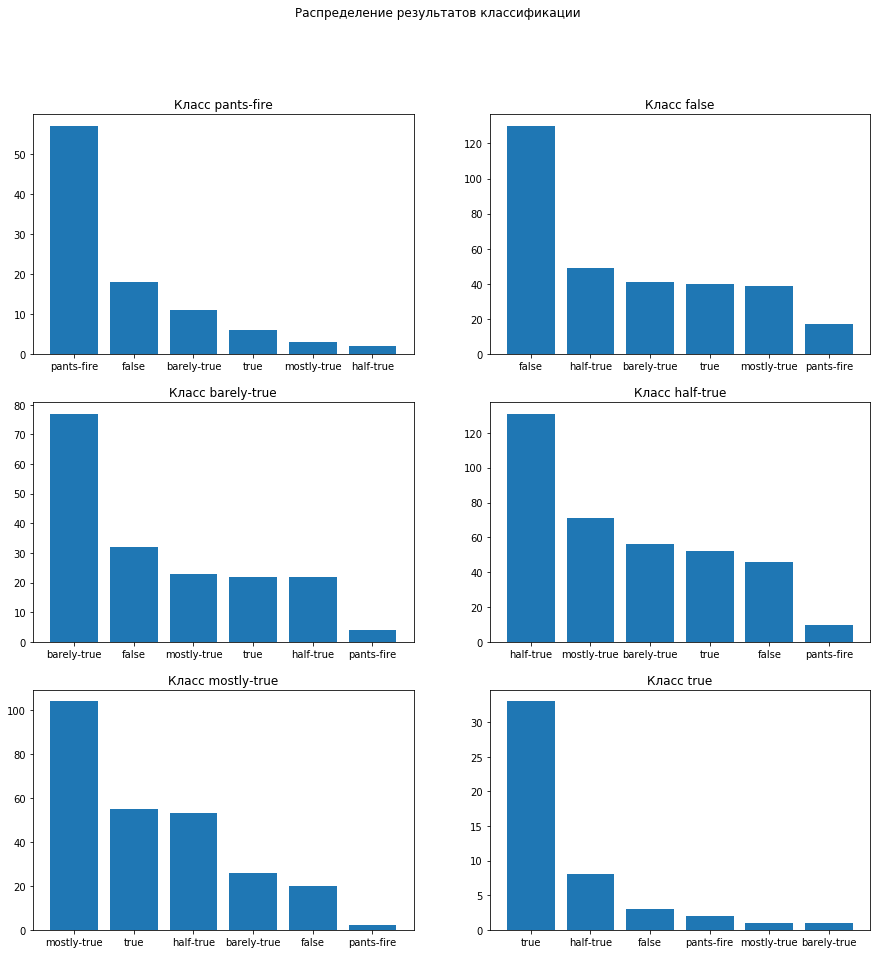

In [56]:
fig, axs = plt.subplots(3,2)
fig.suptitle('Распределение результатов классификации')
fig.set_figheight(15)
fig.set_figwidth(15)
y_labels_dict = {0:'pants-fire', 1:'false',2:'barely-true', 3:'half-true', 4:'mostly-true', 5:'true'}
k = 0
for i in range(3):
    for j in range(2):
        pldf = explore_predicts[explore_predicts.SVM == k]['True'].value_counts()
        axs[i][j].bar([y_labels_dict[k] for k in list(pldf.keys())], pldf.values)
        axs[i][j].set_title(f'Класс {y_labels_dict[k]}')
        k+=1

In [ ]:
plt.barh(list(Topic_counter.keys()), Topic_counter.values())